In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob

In [16]:
def check_bias(model, xrange, filename=None):
    n_bin = 50
    step = (xrange[1] - xrange[0]) / n_bin
    n_bin_pos = int(xrange[1] / (xrange[1]-xrange[0]) * n_bin)
    n_bin_neg = n_bin - n_bin_pos
    
    pos_bins = np.array([ i * step for i in range(n_bin_pos) ])
    neg_bins = np.array([ -i * step for i in reversed(range(n_bin_neg)) ])
    
    plt.figure(figsize=(30, 80))
    count = 1
    for m in model.modules():
        if isinstance(m, BatchNorm2d):
            plt.subplot(20, 8, count)
            count += 1
            
            bias = m.bias.detach().numpy()

            n = bias.shape[0]
            pos = np.sum(bias > 0)
            neg = n - pos
            plt.hist(bias[bias < 0], bins=neg_bins, color = "skyblue", label="%.2f%%" % (neg * 100 / n))
            plt.hist(bias[bias >= 0], bins=pos_bins, color = "orange")
            plt.axis([xrange[0], xrange[1], 0, None])
            #plt.title("n: %d, >0: %.2f%% (%d) , <0: %.2f%% (%d)" % (n, pos * 100 / n, pos, neg * 100 / n, neg))
            plt.title('Conv%d' % (count-2))
            plt.legend()
            # plt.annotate('Conv0', xy=(20, -0.5))
    if filename is not None:
        plt.savefig(filename)
    else:
        plt.show()

vgg19_bn


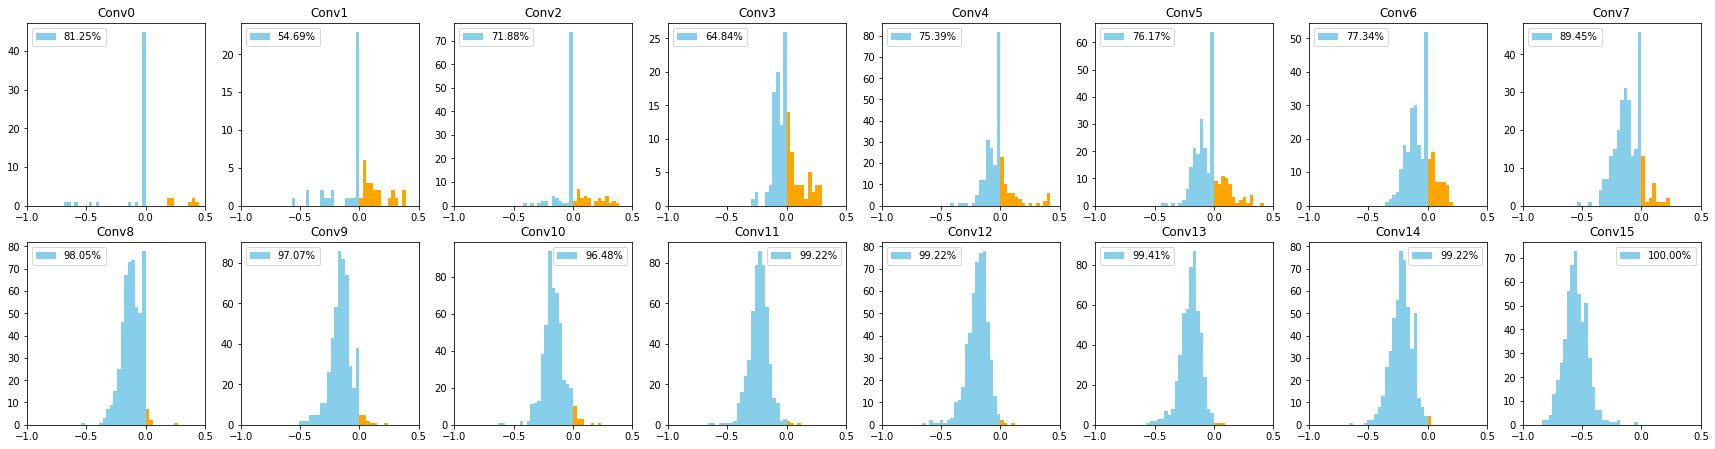

In [17]:
from torchvision.models import vgg, resnet
from torch.nn import Conv2d, BatchNorm2d

xrange = (-1, 0.5)
#for model in ("vgg11_bn", "vgg13_bn", "vgg16_bn", "vgg19_bn"):
for model in ("vgg19_bn",):
    print(model)
    m = eval(f"vgg.{model}(pretrained=True)")
    check_bias(m, xrange, filename=model + ".pdf")

resnet18


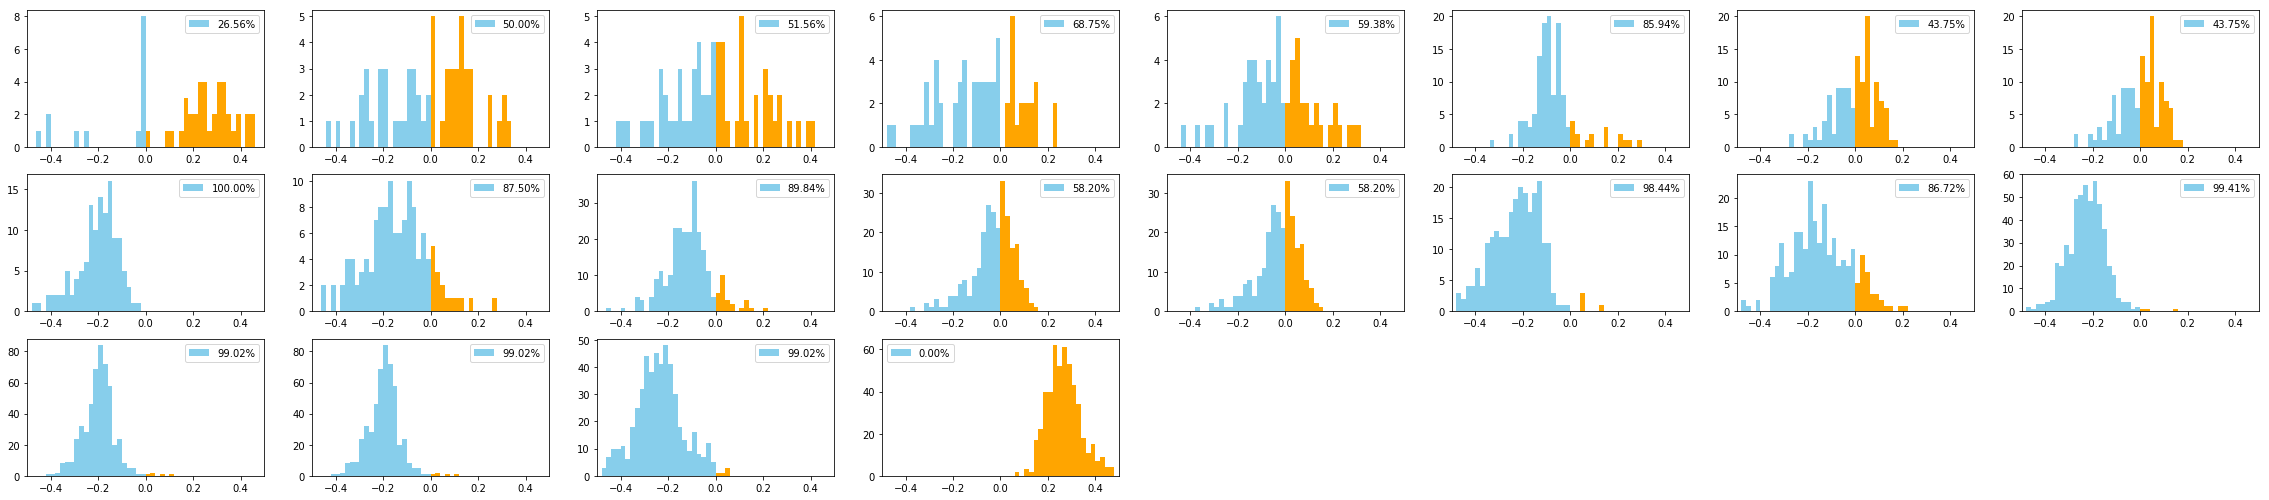

resnet34


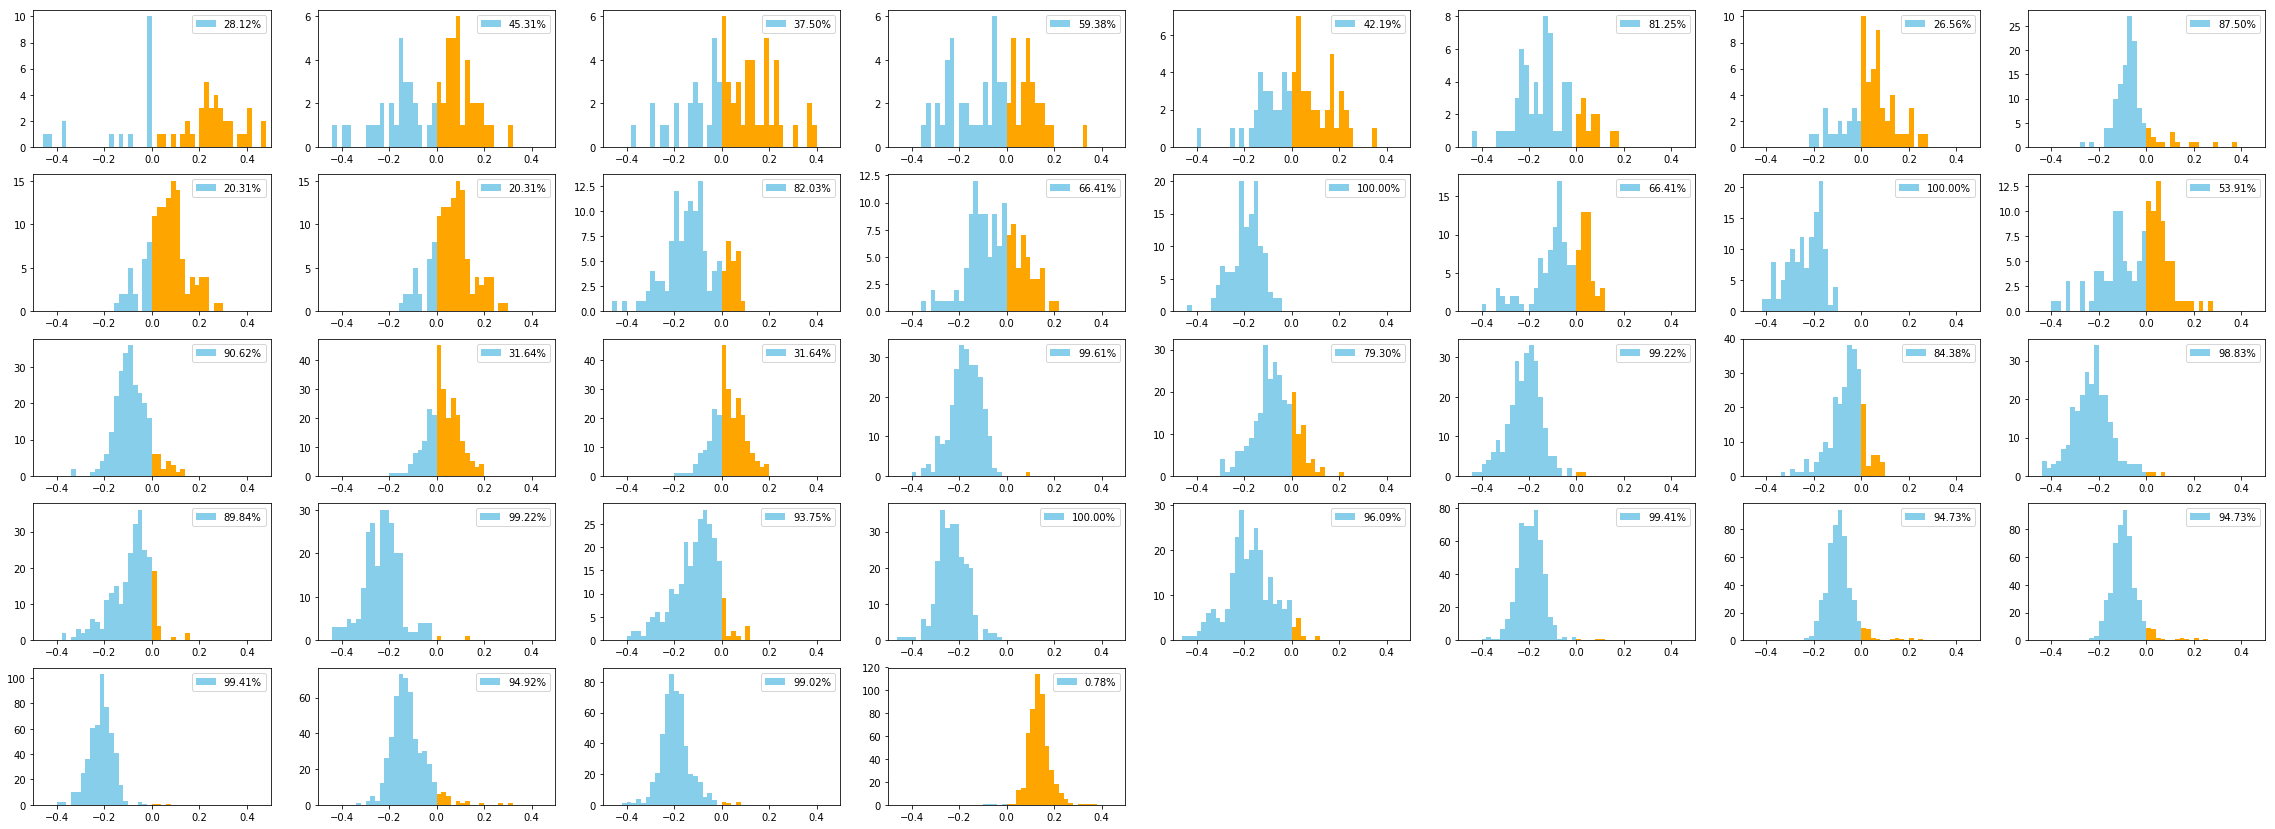

resnet50


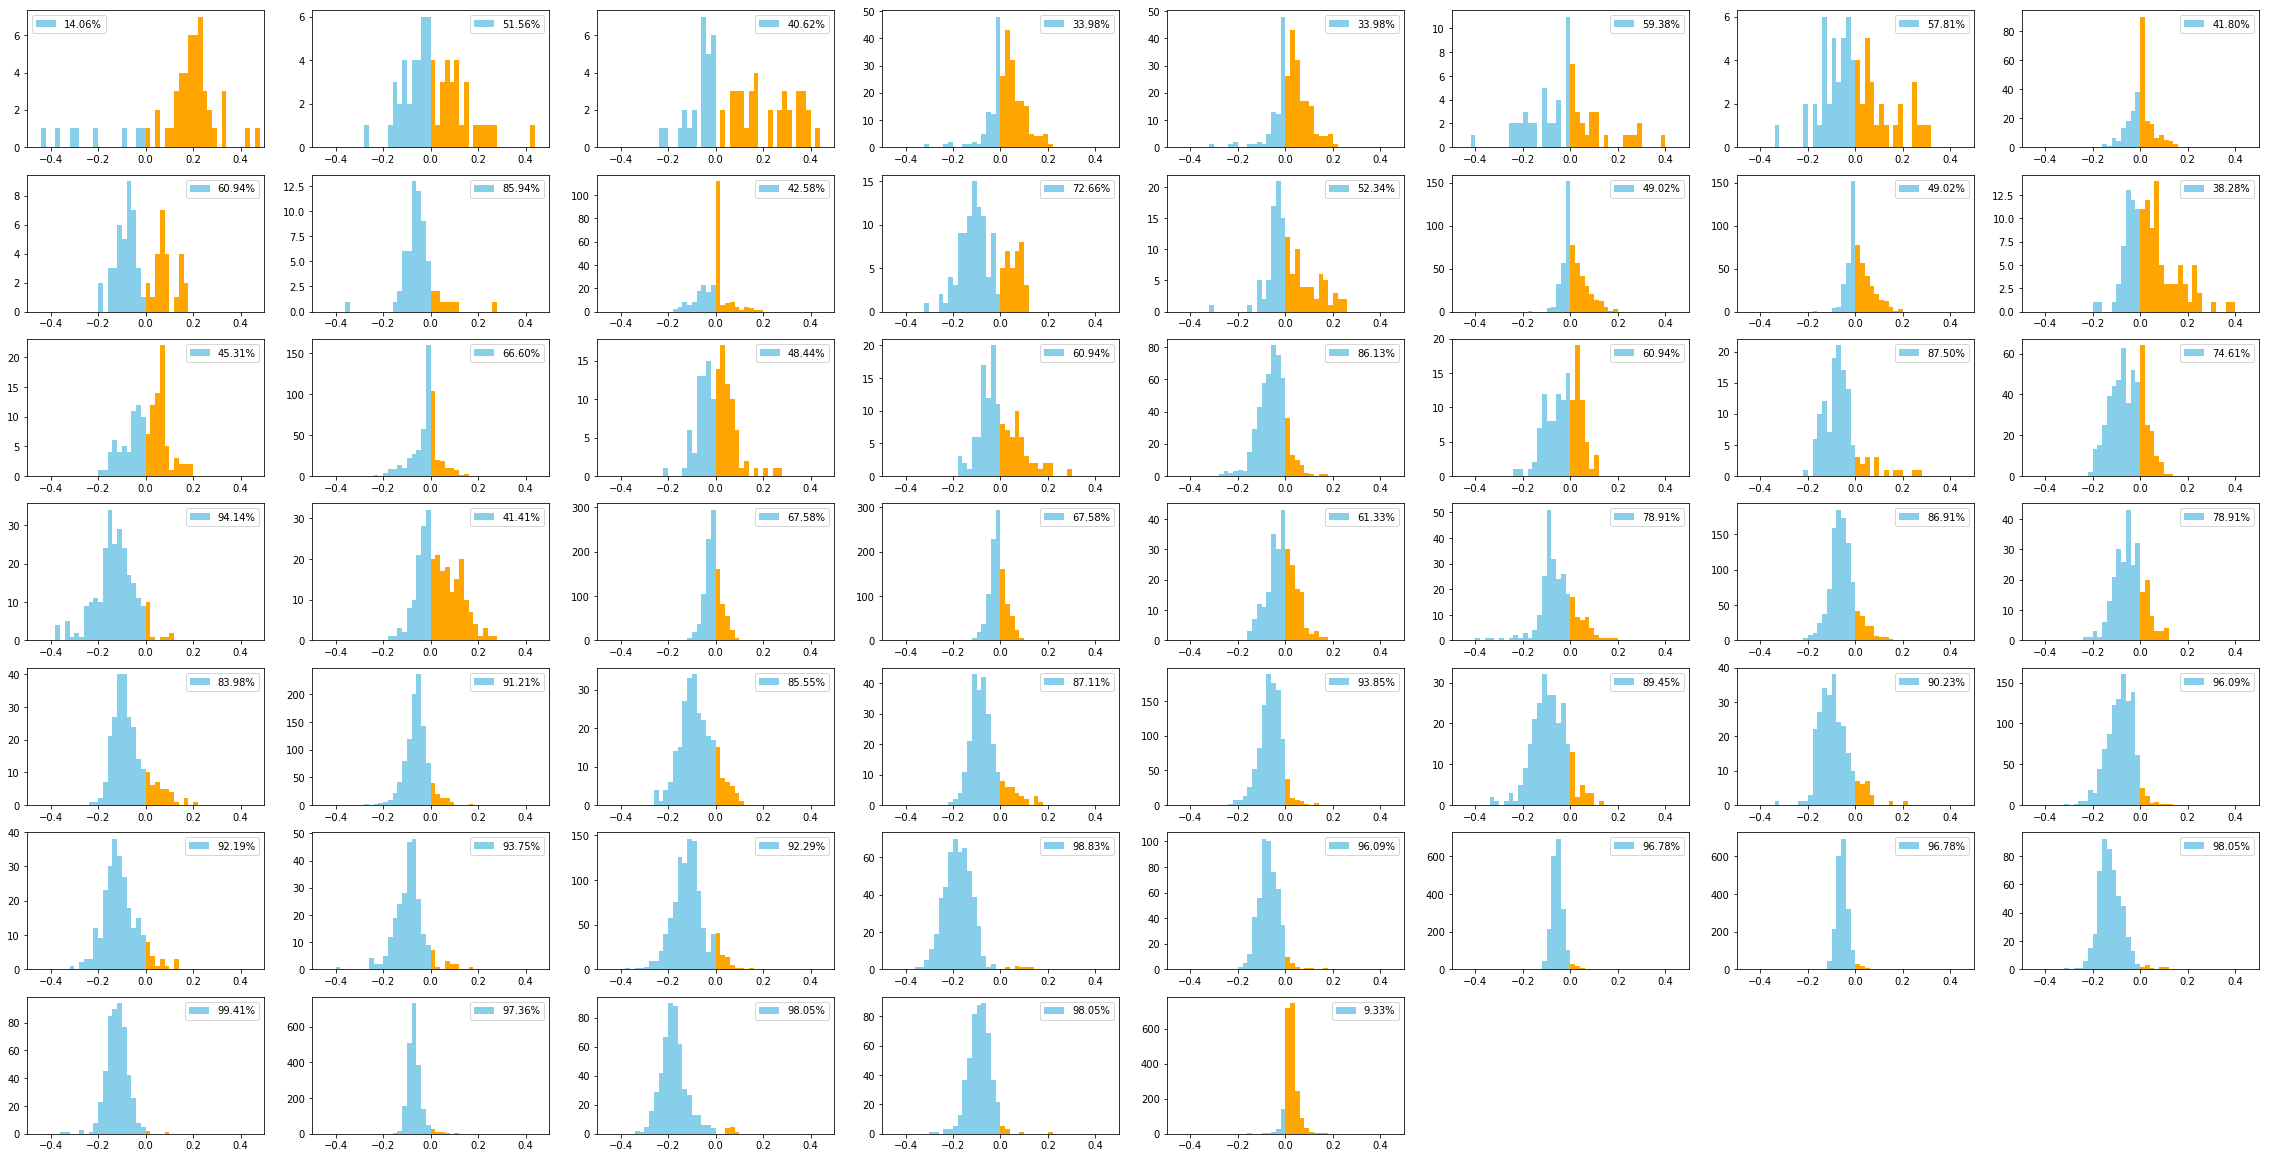

resnet101


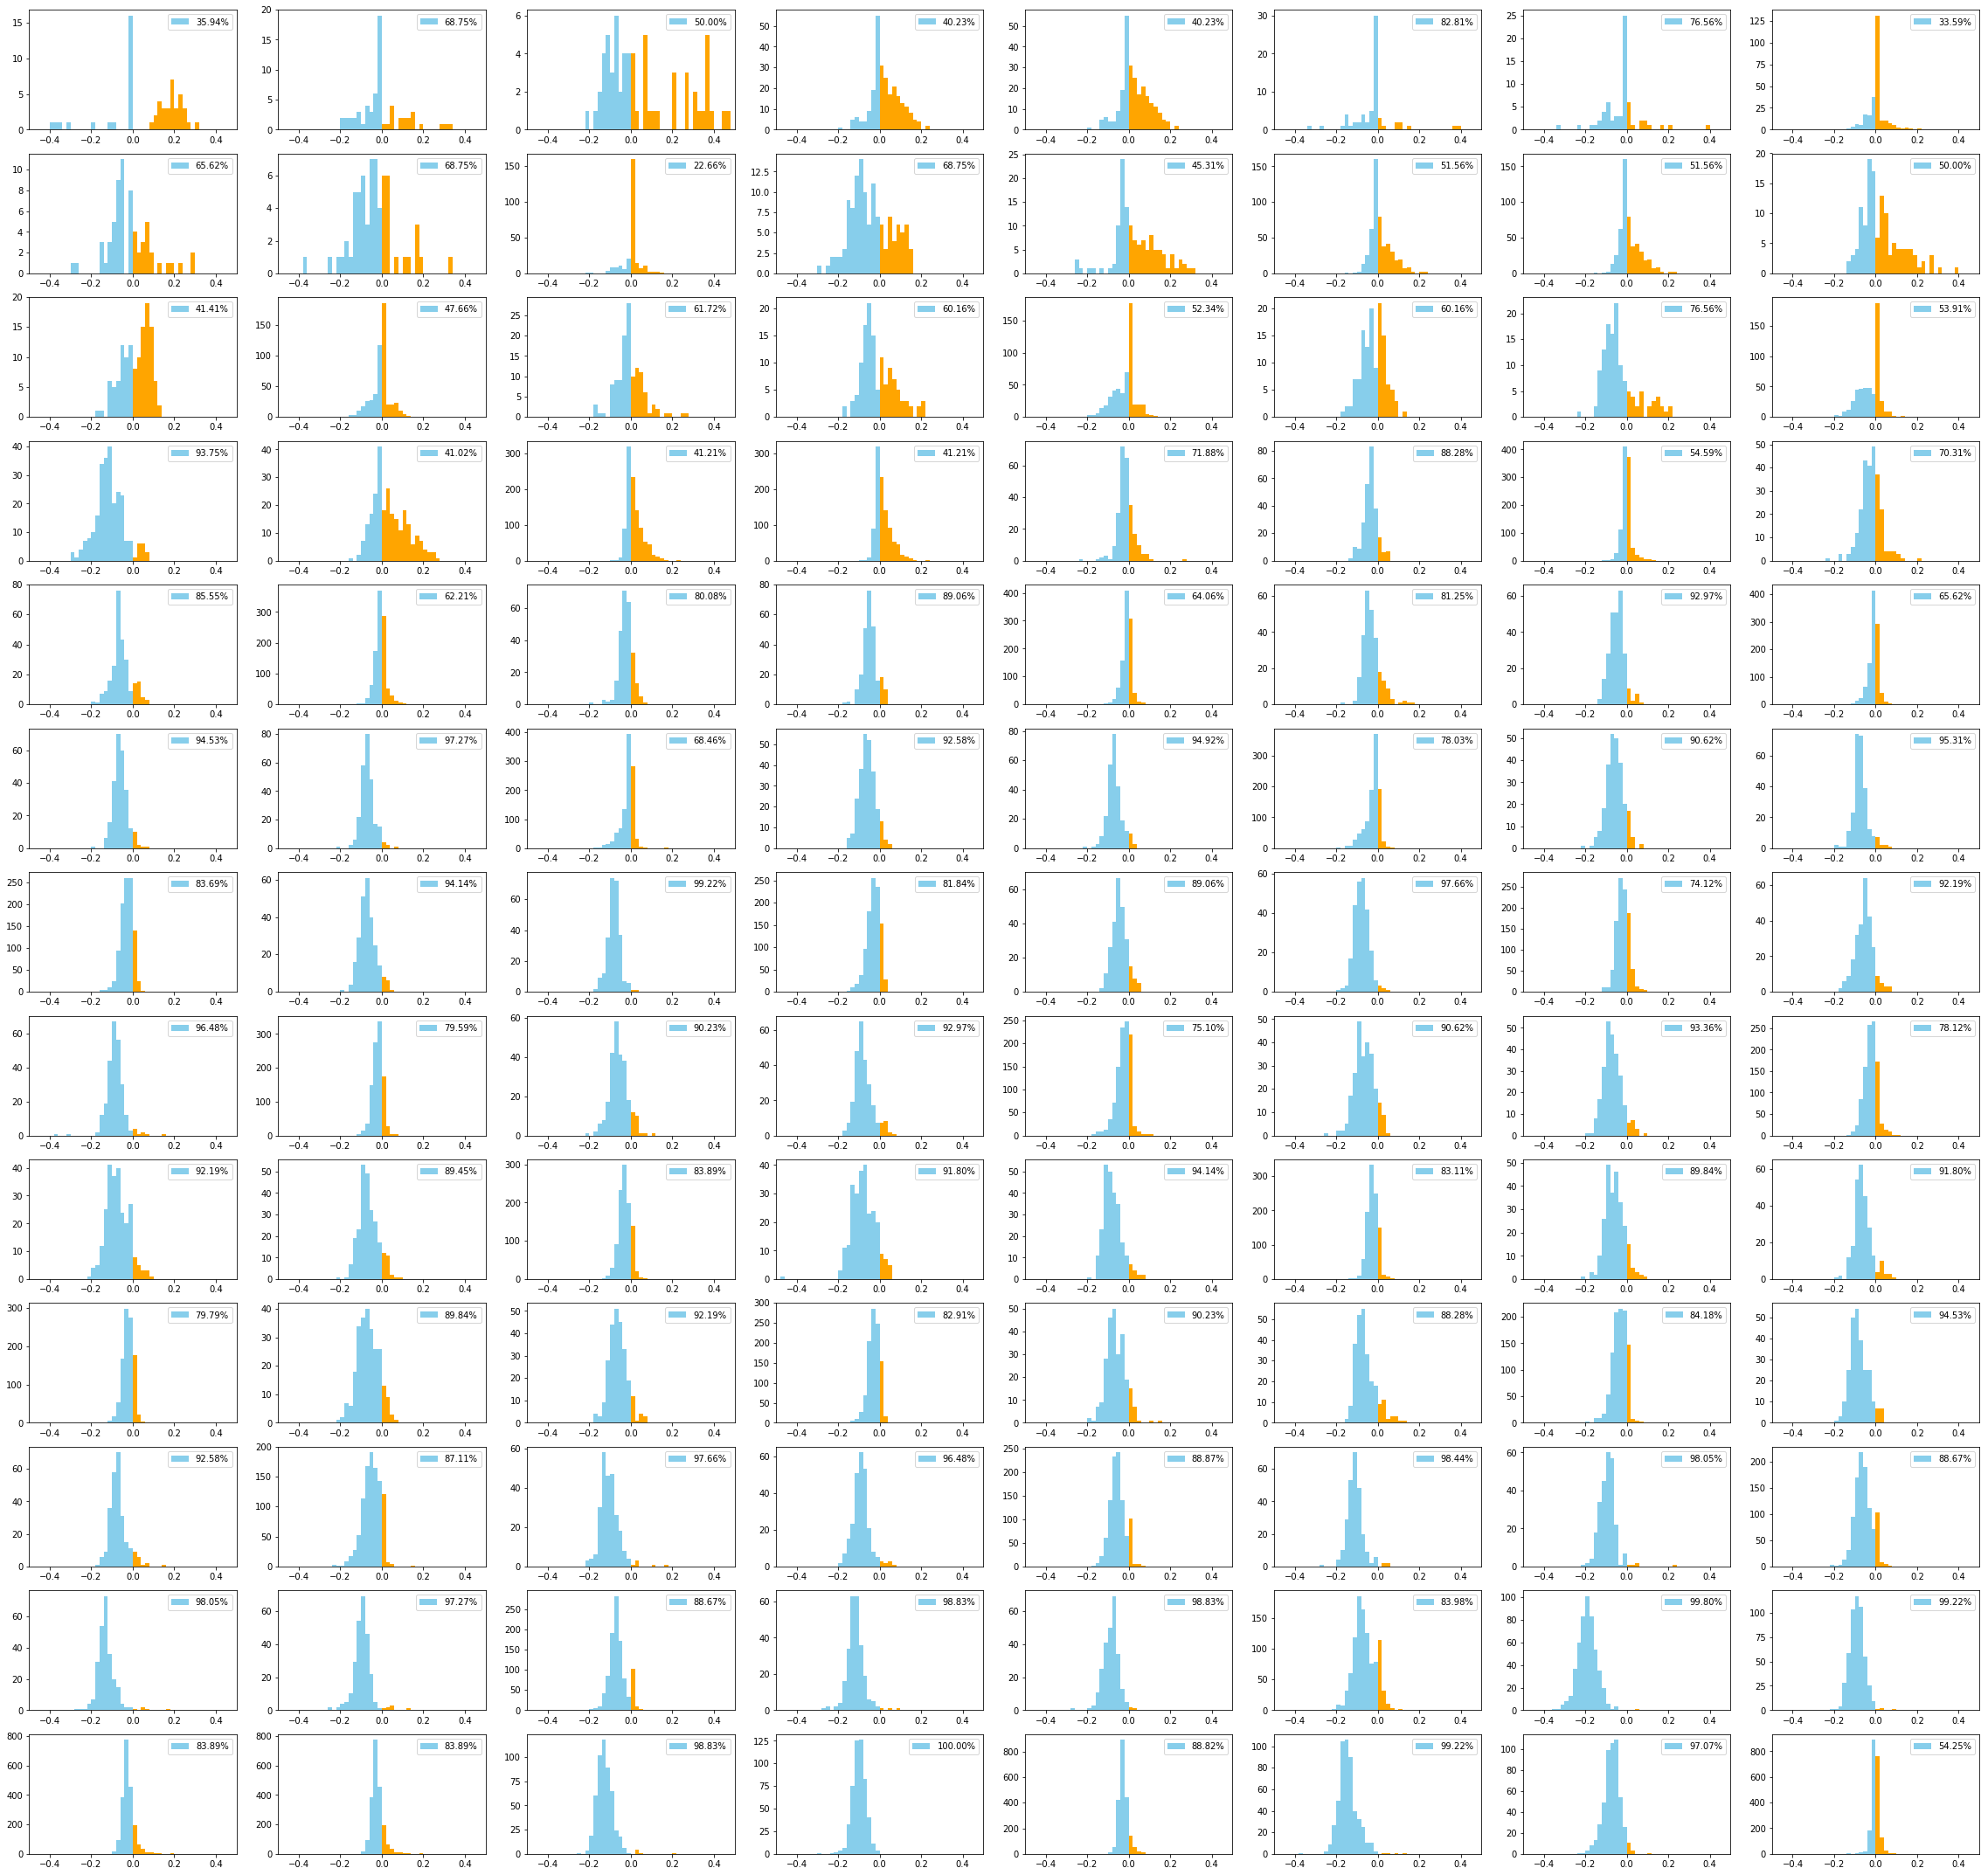

In [74]:
xrange = (-0.5, 0.5)
for model in ("resnet18", "resnet34", "resnet50", "resnet101"):
    print(model)
    m = eval(f"resnet.{model}(pretrained=True)")
    check_bias(m, xrange)